In [1]:
#Import libraries

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing CSV file

blog_df = pd.read_csv('blogs.csv')
blog_df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


# Exploring Data (EDA)

In [3]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
blog_df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [5]:
blog_df.duplicated().sum()

np.int64(0)

# Data Pre-Processing 

In [6]:
# Making a function to automate the process of cleaning the text

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

In [7]:
# Apply text cleaning
blog_df['Cleaned_Data'] = blog_df['Data'].apply(clean_text)

In [8]:
blog_df.head()

,Data,Labels,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path frank odwyer newsgroups altatheism subjec...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path bilokcforumosrheedu...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path jbrownbatmanbmdtrwcom newsgroups altathei...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu newsgroups altathei...


In [9]:
# Feature extraction using TF-IDF with optimized parameters

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.85, min_df=2, stop_words='english')
X = vectorizer.fit_transform(blog_df['Cleaned_Data'])
y = blog_df['Labels']


# Data Visualization of Cleaned Data

Text(0, 0.5, 'Category')

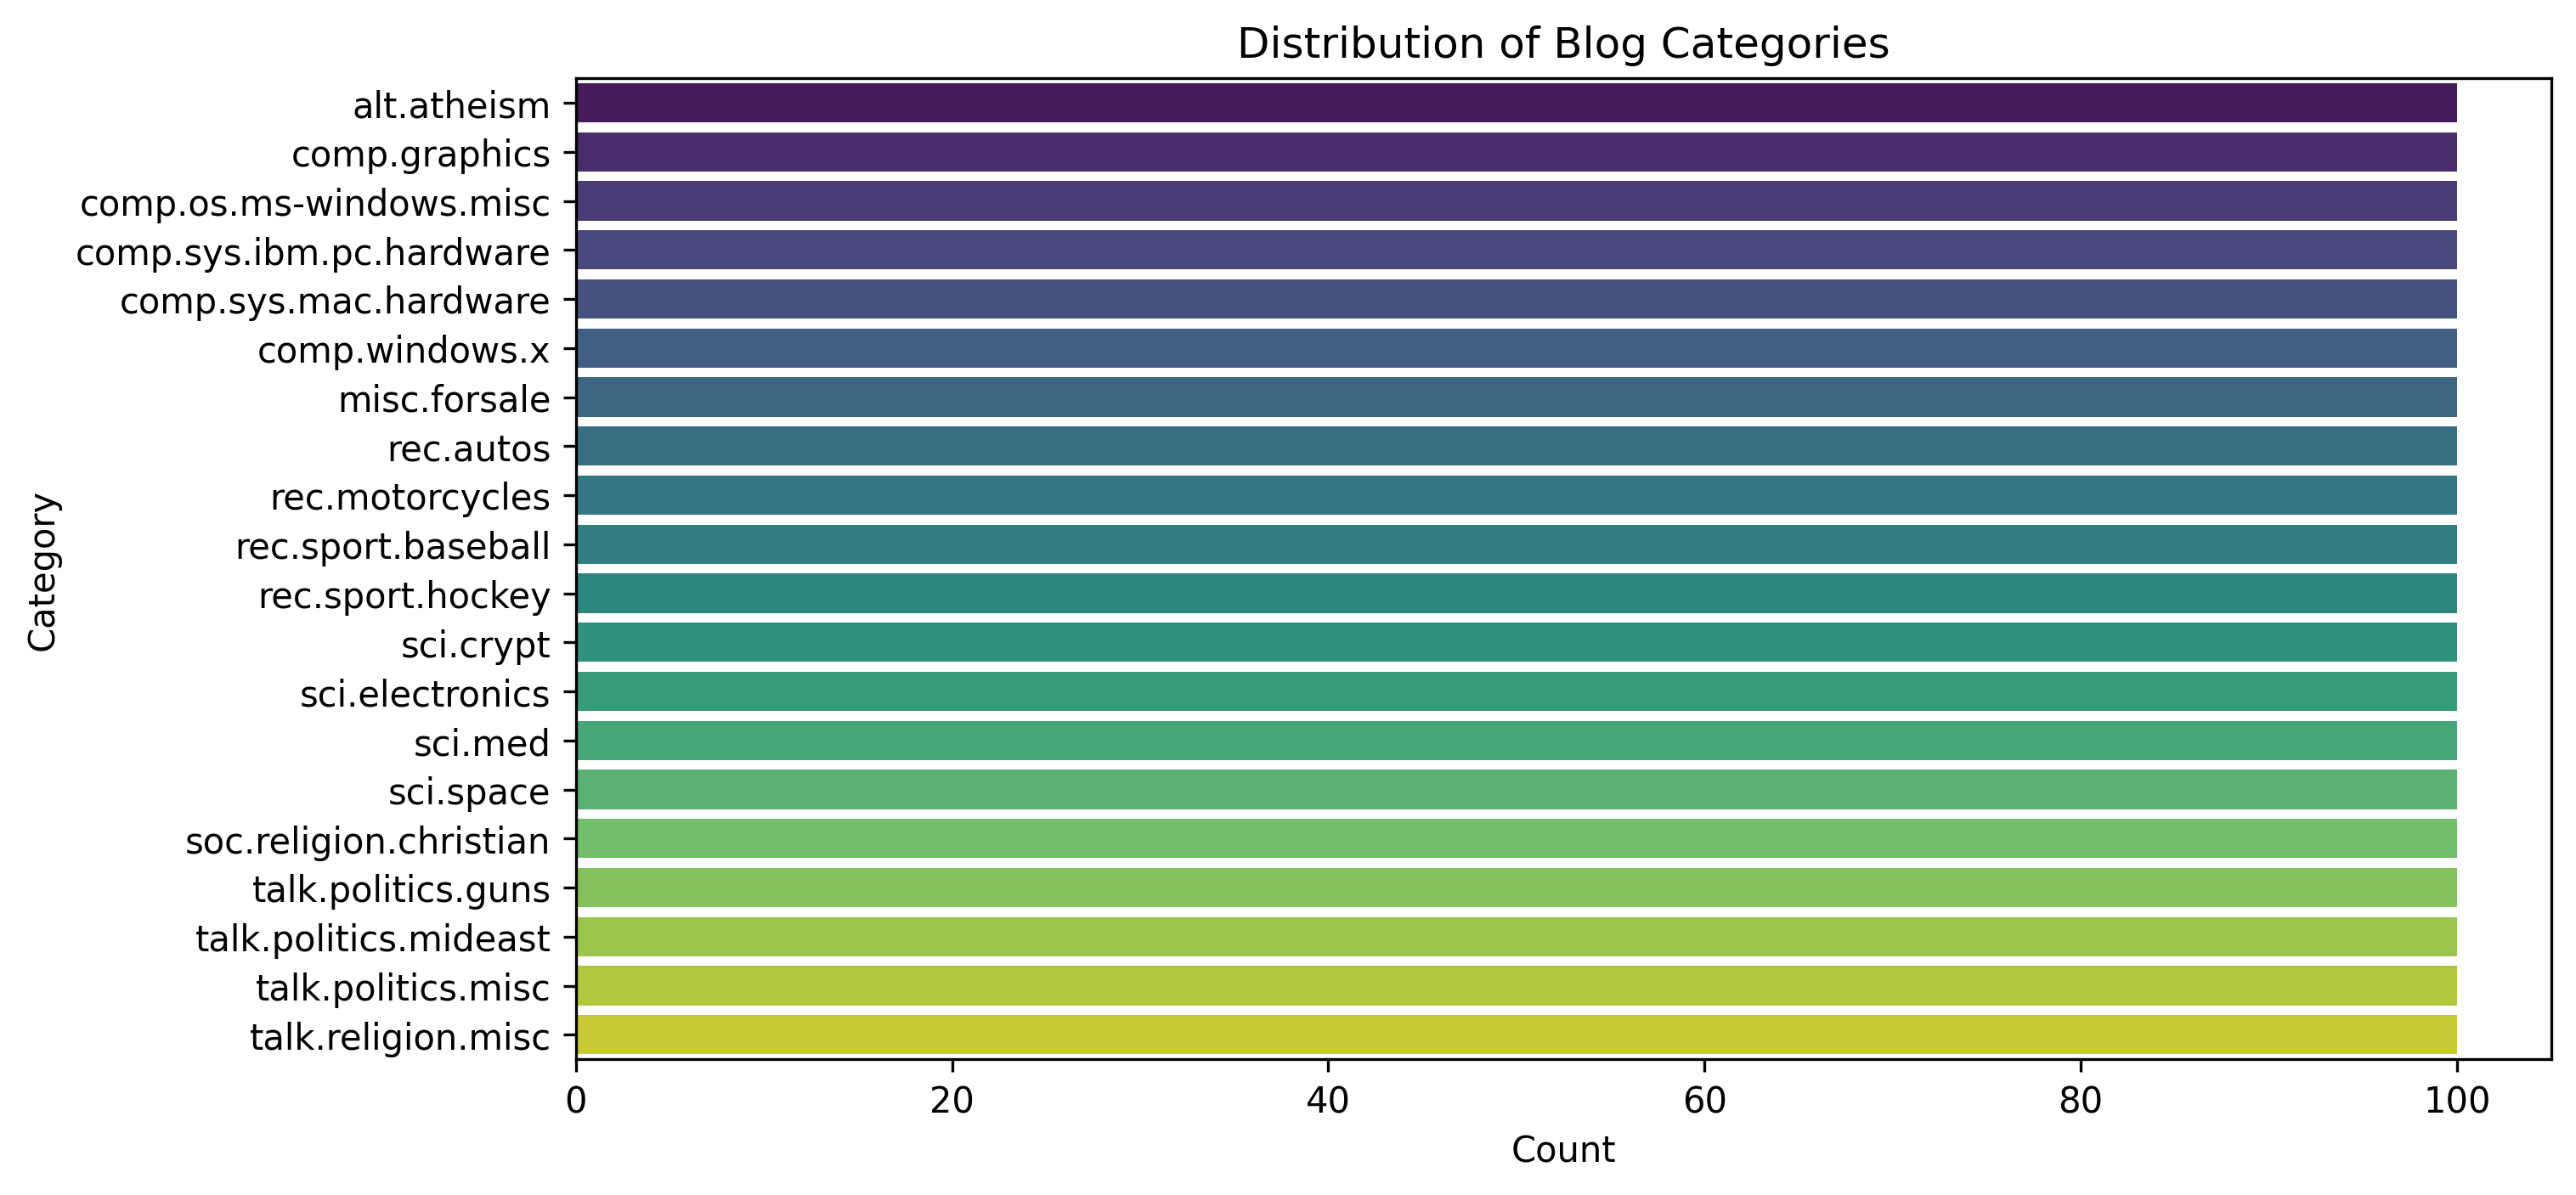

In [10]:
# Plotting the distribution of categories

sns.countplot(y=blog_df['Labels'], order=blog_df['Labels'].value_counts().index, palette='viridis')
plt.title("Distribution of Blog Categories")
plt.xlabel("Count")
plt.ylabel("Category")

Text(0.5, 1.0, 'Word Cloud of Blog Posts')

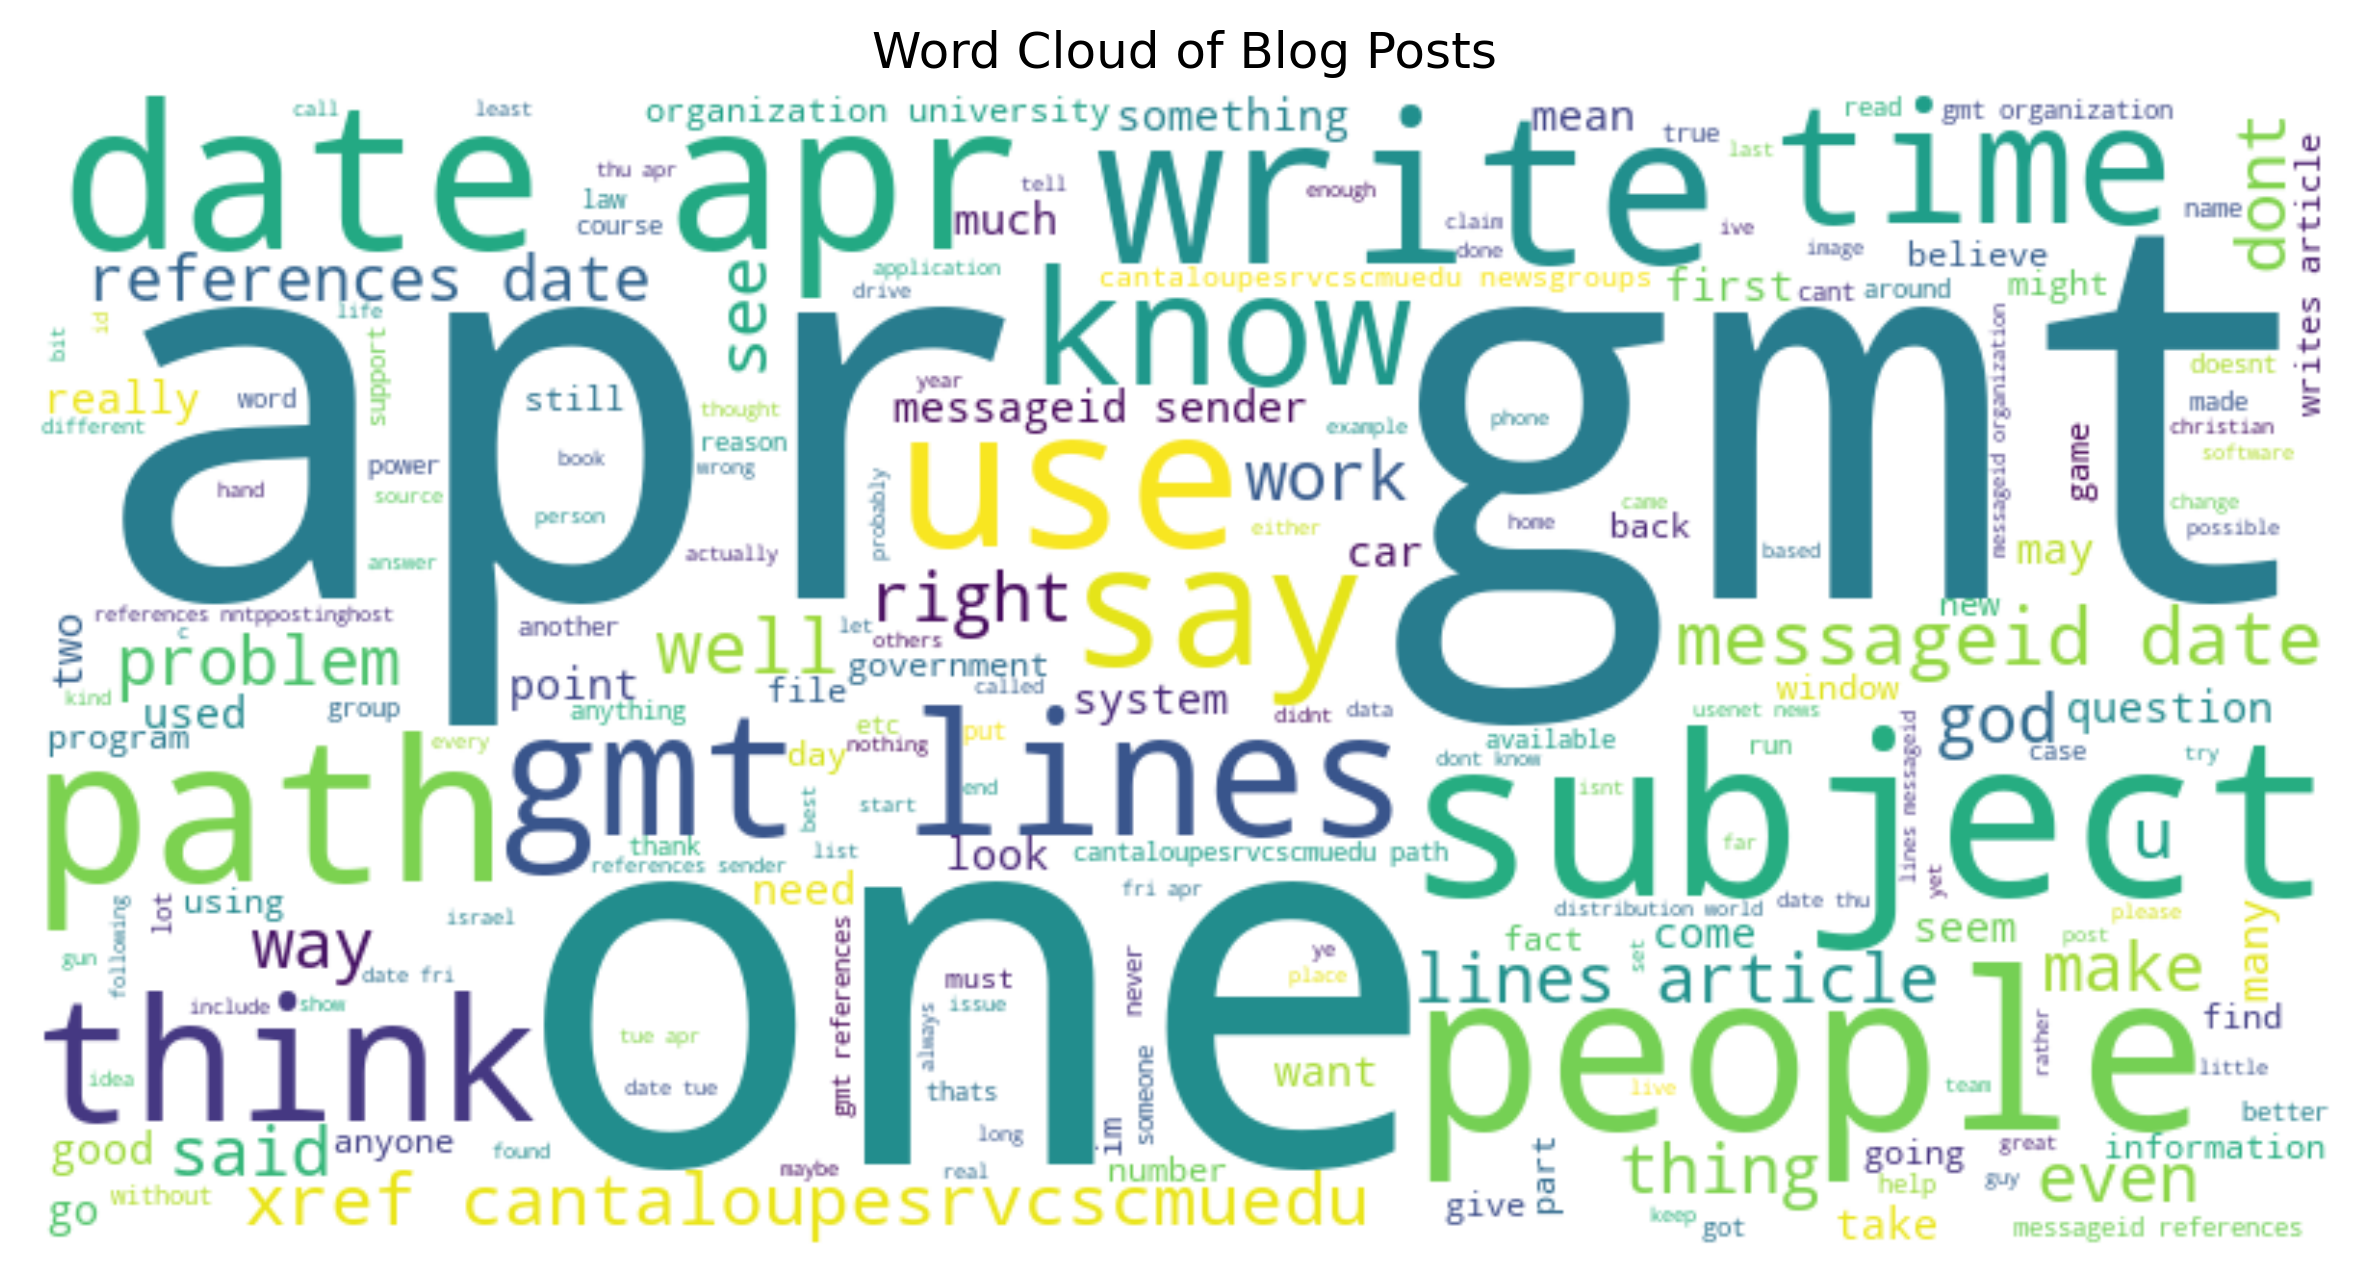

In [11]:
# Word Cloud for most frequent words

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(blog_df['Cleaned_Data']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Blog Posts")

# Applying Naive Bayes Model

In [12]:
# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Train Naive Bayes model

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

In [14]:
# Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.88
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.80      0.80      0.80        20
           comp.graphics       0.95      0.90      0.92        20
 comp.os.ms-windows.misc       0.95      0.95      0.95        20
comp.sys.ibm.pc.hardware       0.67      0.90      0.77        20
   comp.sys.mac.hardware       0.94      0.80      0.86        20
          comp.windows.x       0.95      0.90      0.92        20
            misc.forsale       1.00      0.90      0.95        20
               rec.autos       0.95      1.00      0.98        20
         rec.motorcycles       1.00      0.95      0.97        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.85      0.85      0.85        20
                 sci.med       0.94 

Text(0.5, 1.0, 'Confusion Matrix')

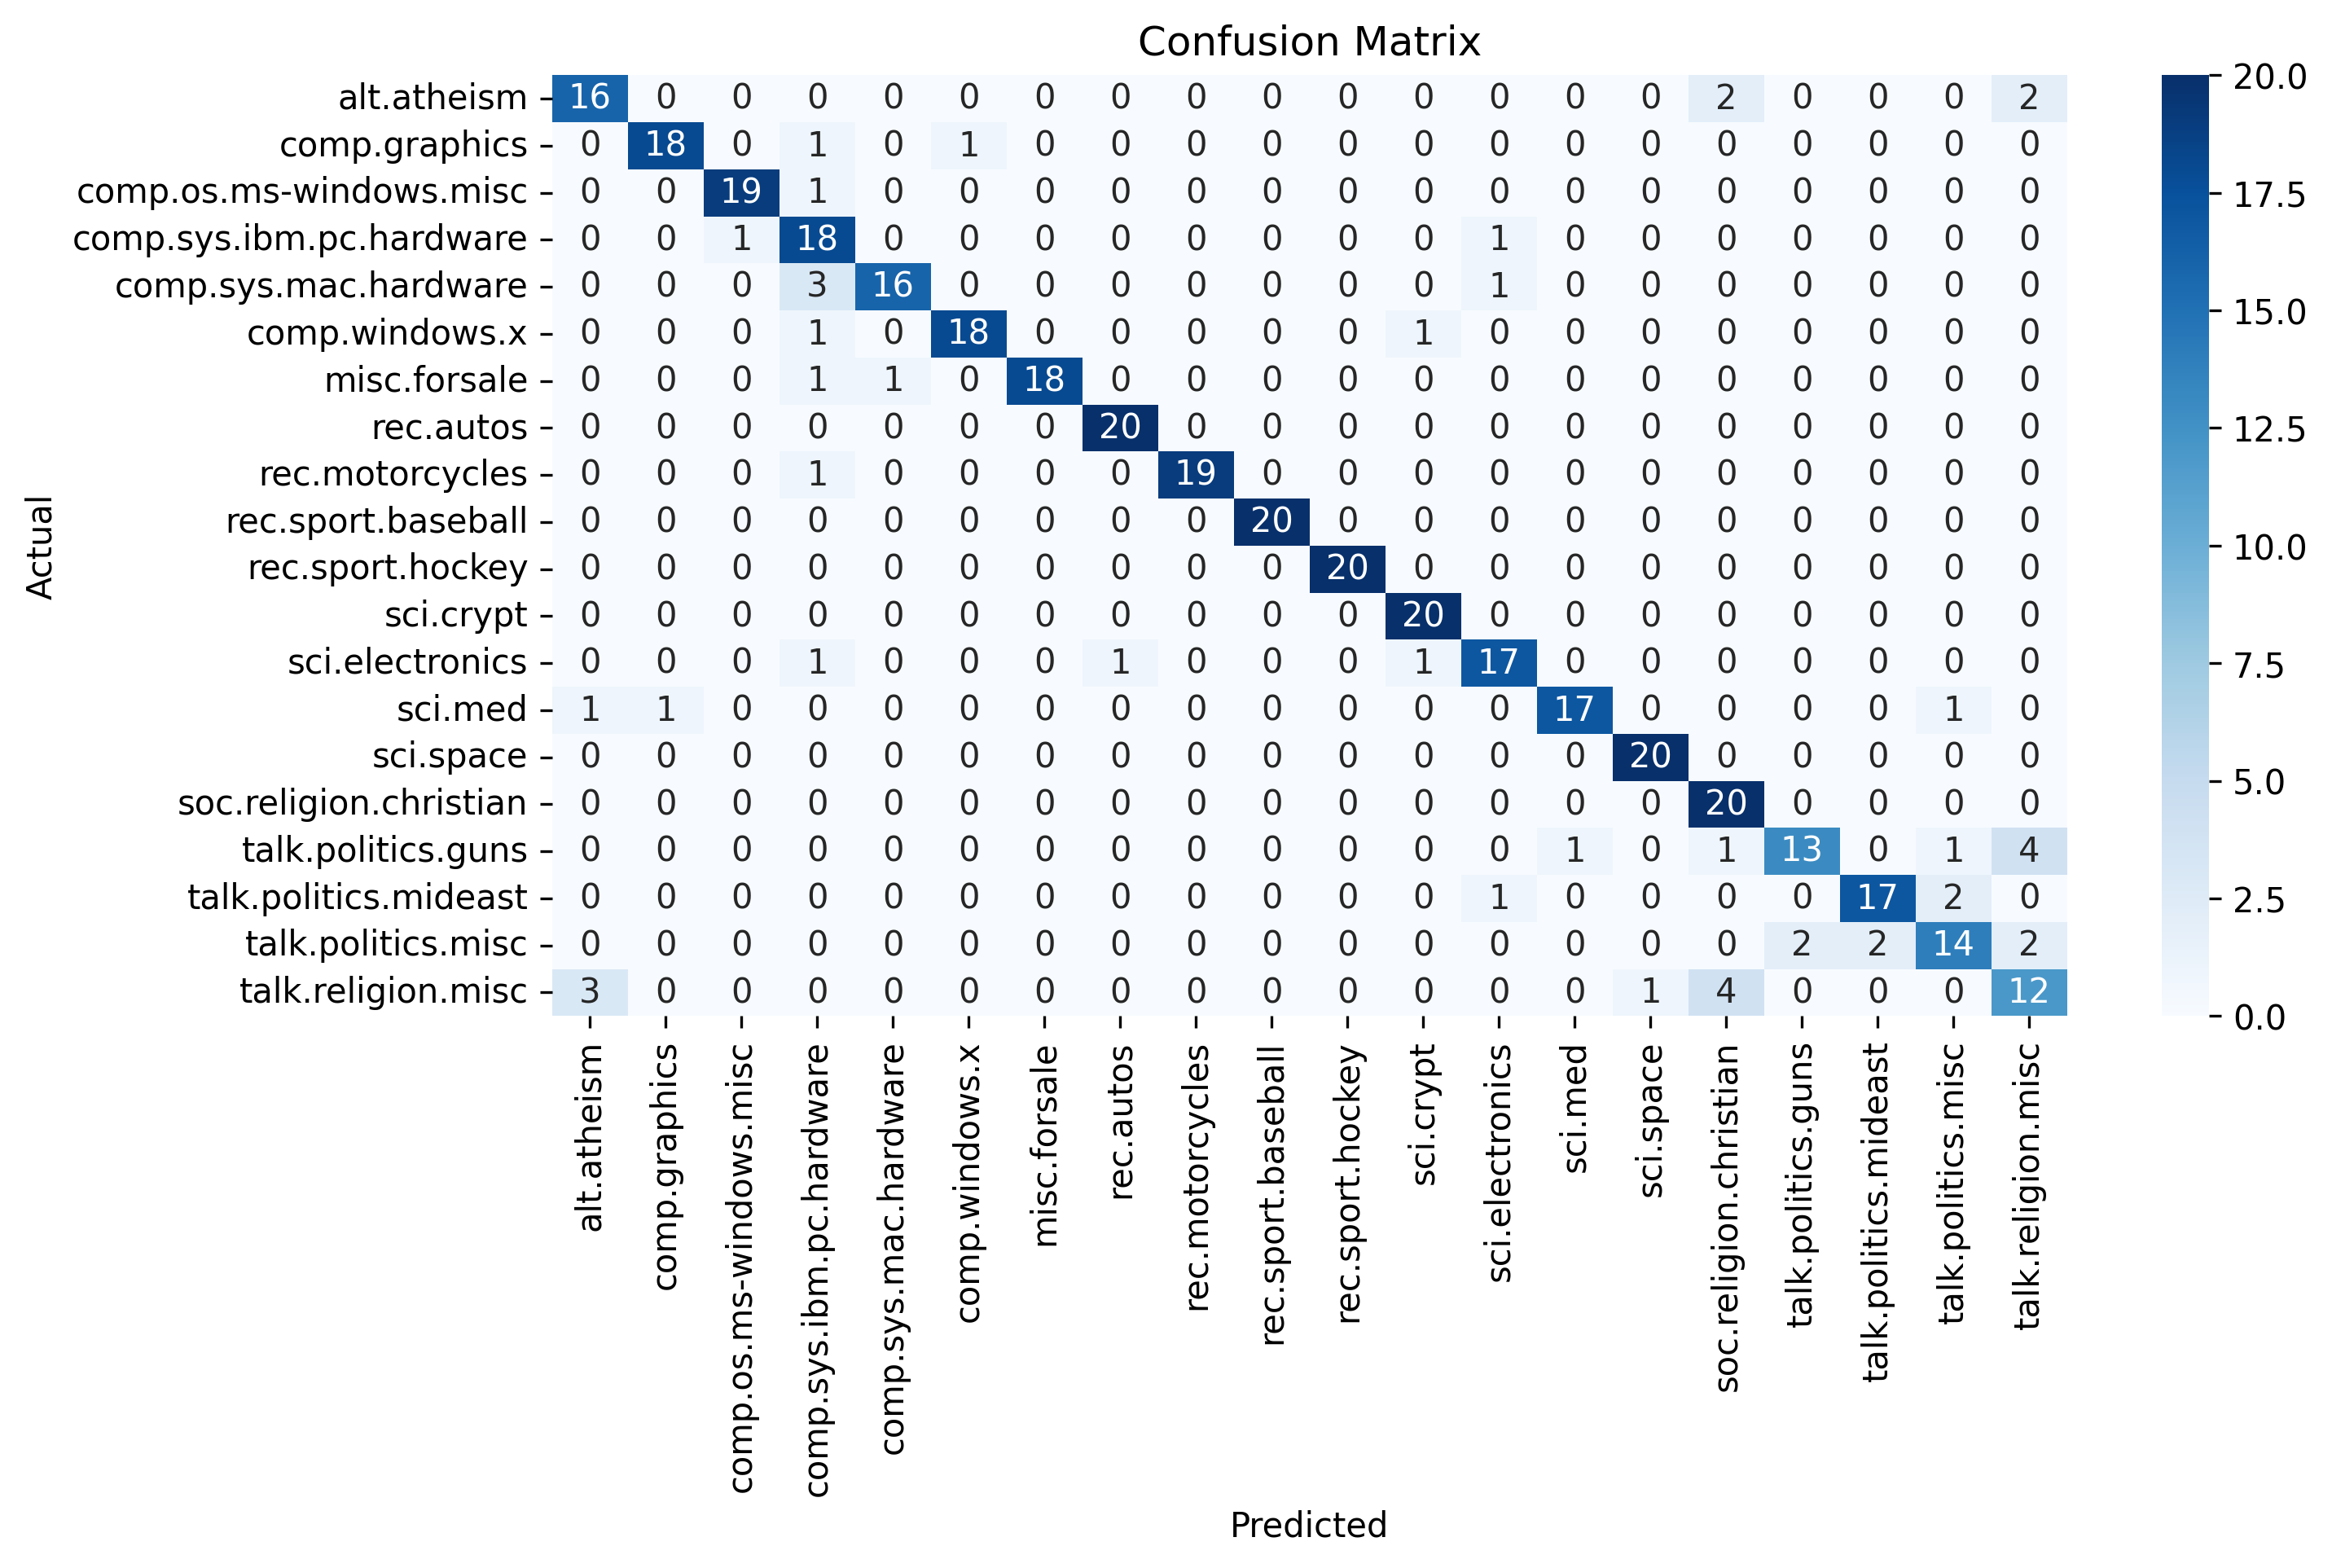

In [15]:
# Plotting confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Sentiment Analysis

In [16]:
# Sentiment Analysis

def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Adding a new column for sentiments
blog_df['Sentiment'] = blog_df['Data'].apply(get_sentiment)

In [17]:
blog_df.head()

,Data,Labels,Cleaned_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path frank odwyer newsgroups altatheism subjec...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path bilokcforumosrheedu...,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path jbrownbatmanbmdtrwcom newsgroups altathei...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu newsgroups altathei...,Positive


In [18]:
# Sentiment distribution by category
sentiment_distribution = blog_df.groupby(['Labels', 'Sentiment']).size().unstack()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc            

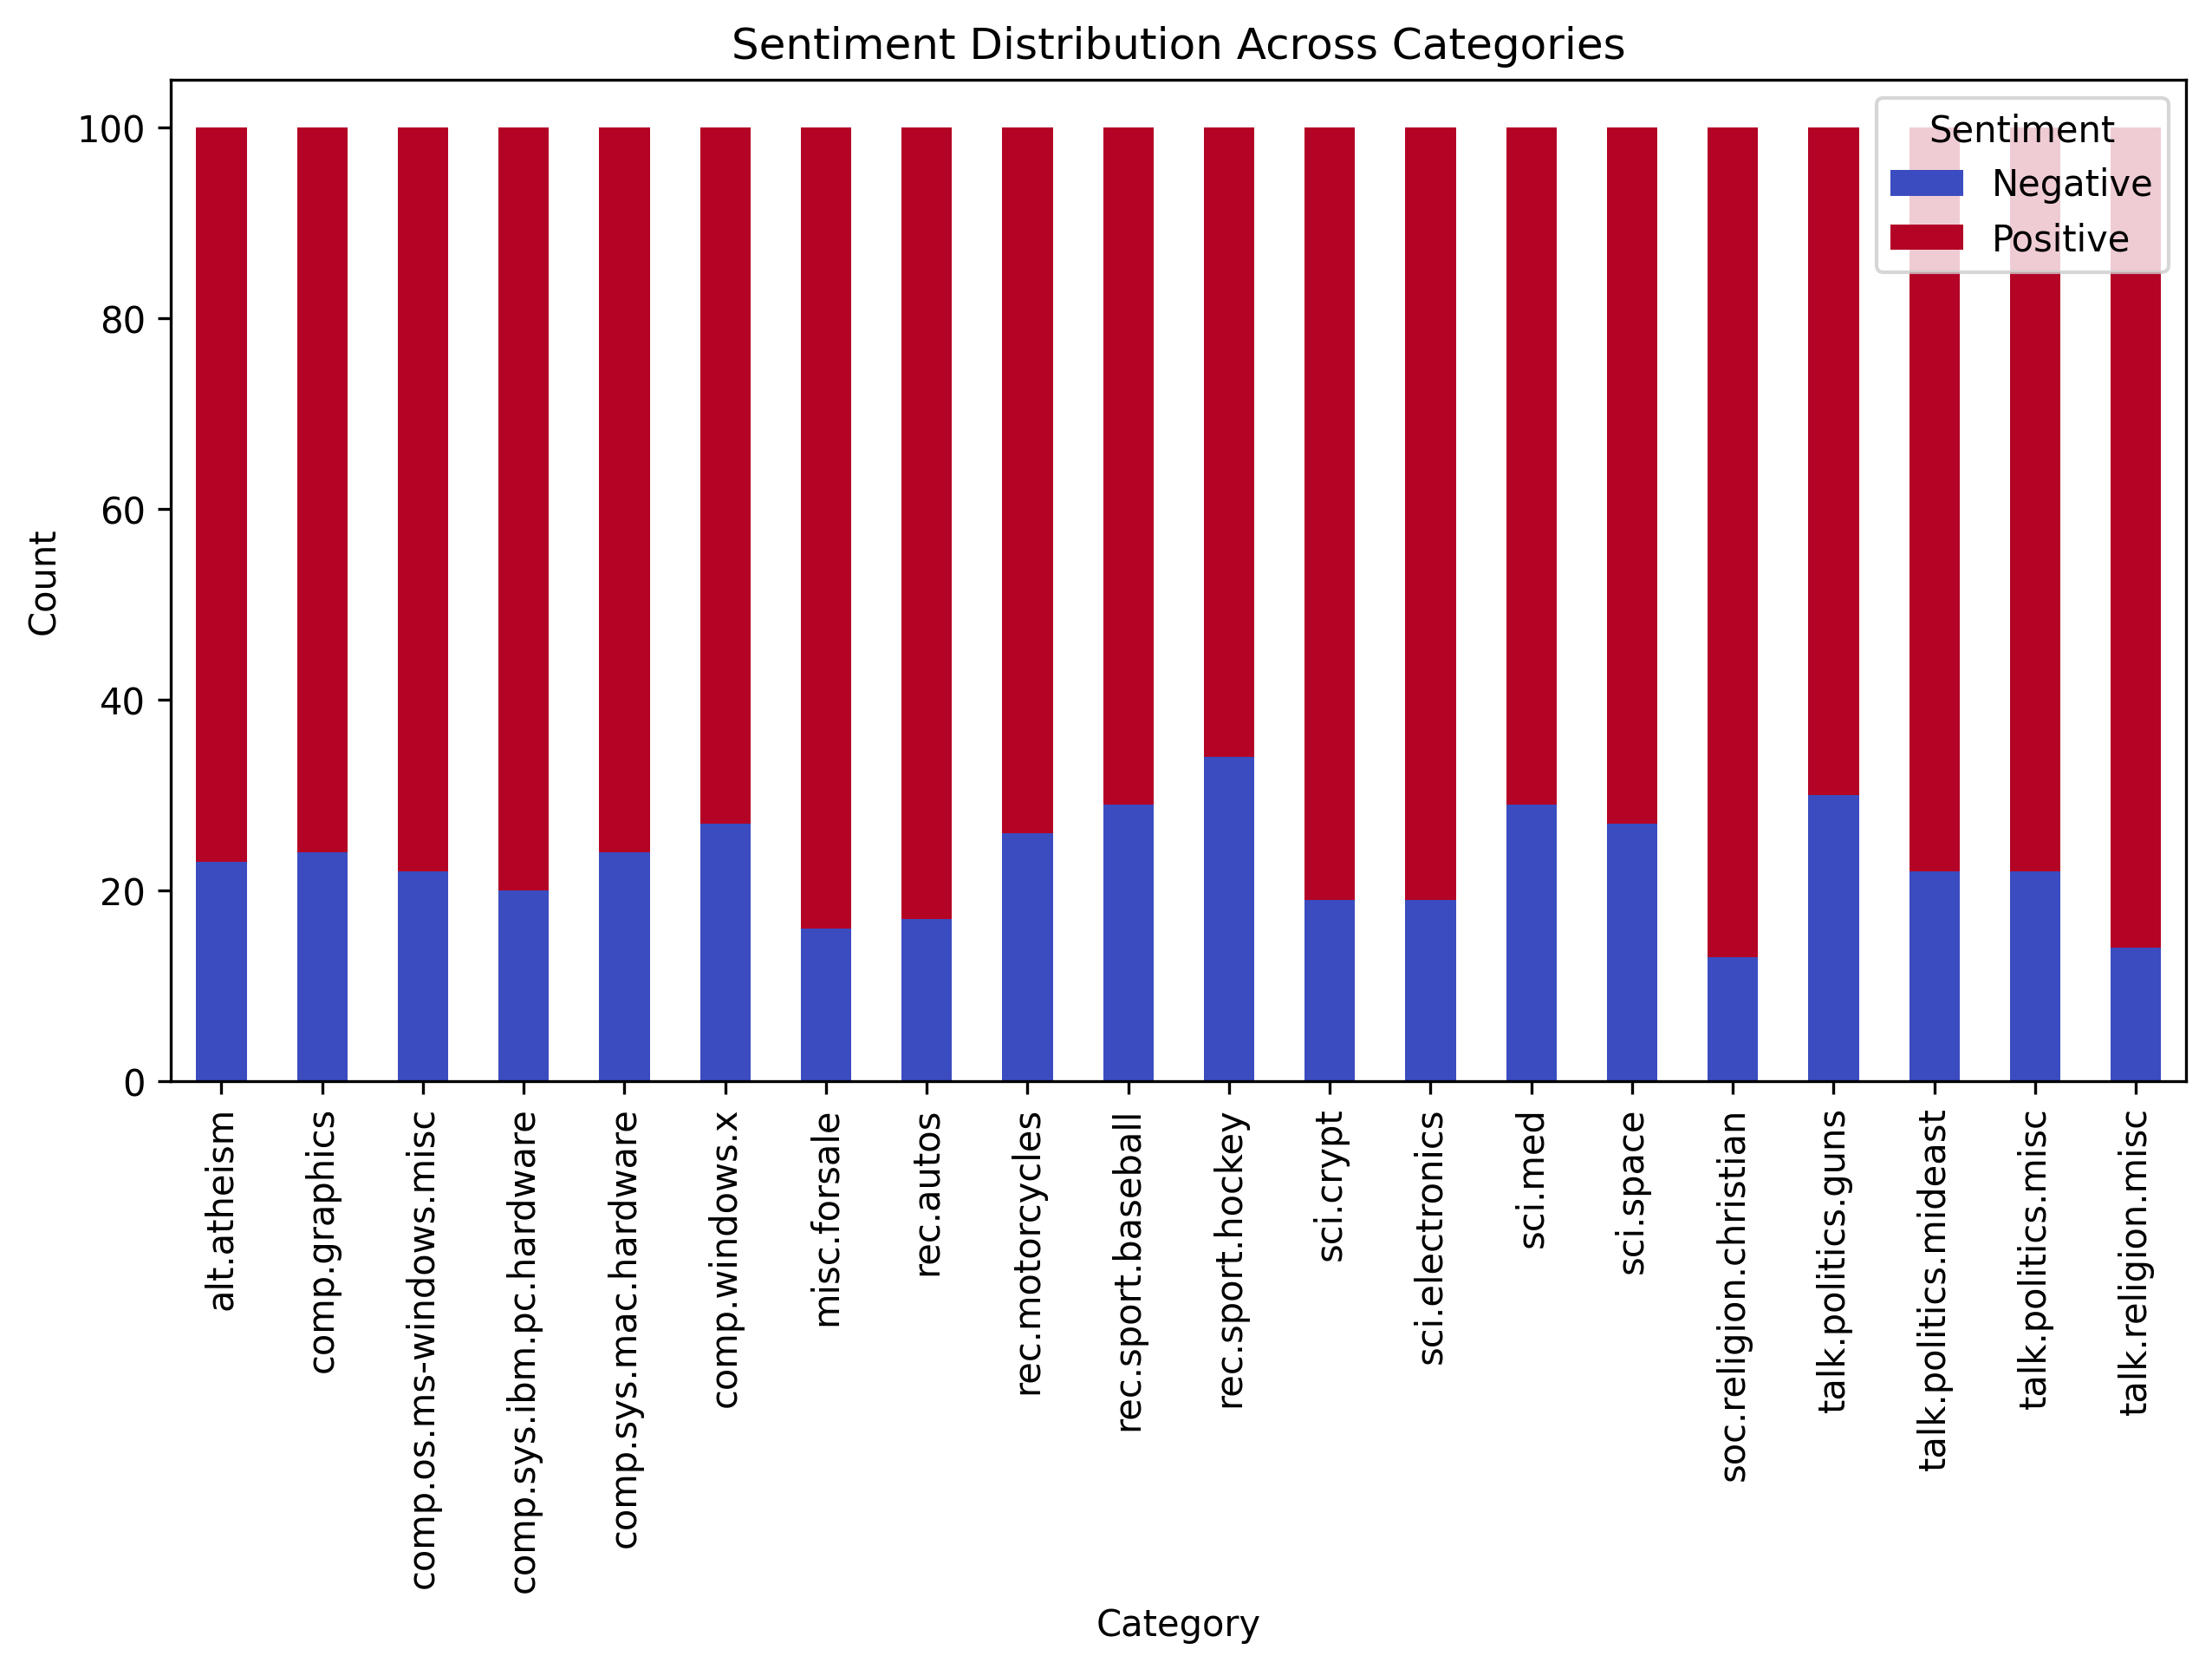

In [19]:
# Plot sentiment distribution

sentiment_distribution.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sentiment")

# Training Model with ComplimentNB

In [20]:
from sklearn.naive_bayes import ComplementNB

In [21]:
# Train Complement Naive Bayes model (better for imbalanced data)

nb_model = ComplementNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

In [22]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.88
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.76      0.80      0.78        20
           comp.graphics       0.95      0.90      0.92        20
 comp.os.ms-windows.misc       0.95      0.95      0.95        20
comp.sys.ibm.pc.hardware       0.73      0.95      0.83        20
   comp.sys.mac.hardware       1.00      0.90      0.95        20
          comp.windows.x       0.95      0.90      0.92        20
            misc.forsale       1.00      0.95      0.97        20
               rec.autos       0.95      1.00      0.98        20
         rec.motorcycles       1.00      1.00      1.00        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       1.00      0.85      0.92        20
                 sci.med       0.95 

Text(0.5, 1.0, 'Confusion Matrix')

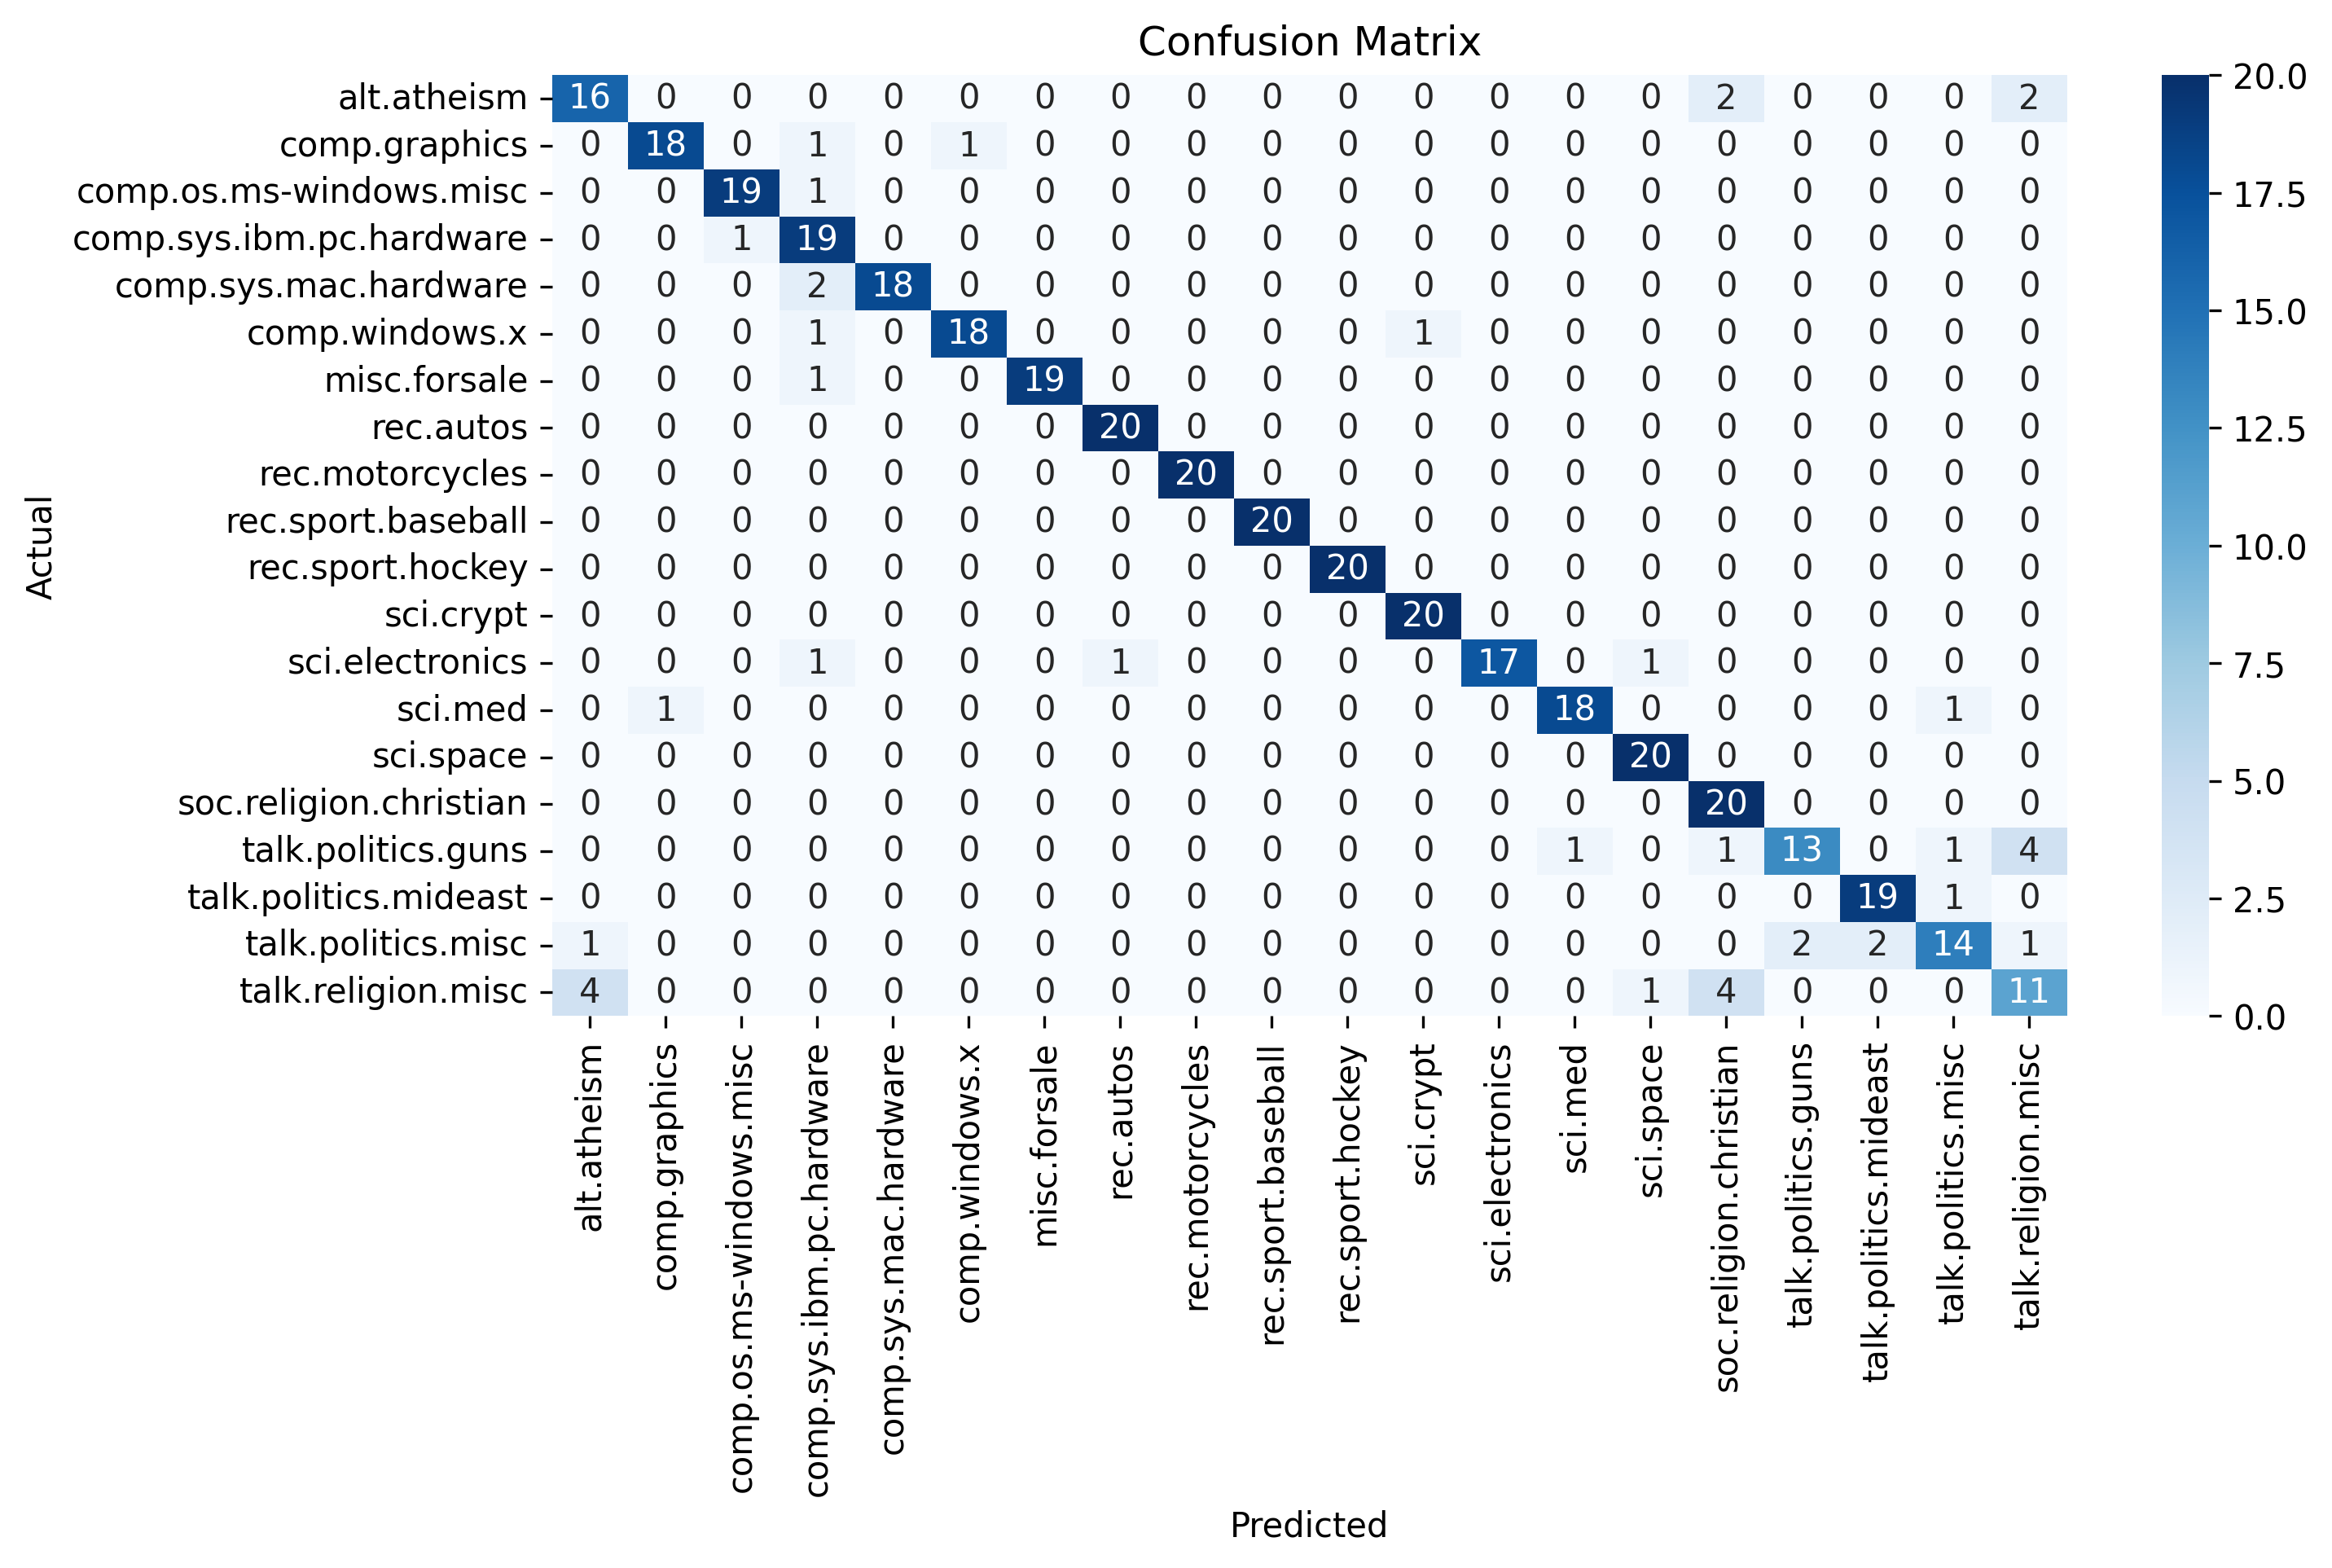

In [23]:
# Plotting confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Sentiment Analysis for ComplimentNB model

In [24]:
# Sentiment Analysis for Complement Naive Bayes model
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

blog_df['Sentiment_CNB'] = blog_df['Data'].apply(get_sentiment)

In [25]:
blog_df.head()

,Data,Labels,Cleaned_Data,Sentiment,Sentiment_CNB
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path frank odwyer newsgroups altatheism subjec...,Positive,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path bilokcforumosrheedu...,Negative,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path jbrownbatmanbmdtrwcom newsgroups altathei...,Positive,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu newsgroups altathei...,Positive,Positive


In [26]:
# Sentiment distribution by category for Complement Naive Bayes model

sentiment_distribution = blog_df.groupby(['Labels', 'Sentiment_CNB']).size().unstack()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Sentiment_CNB             Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc            

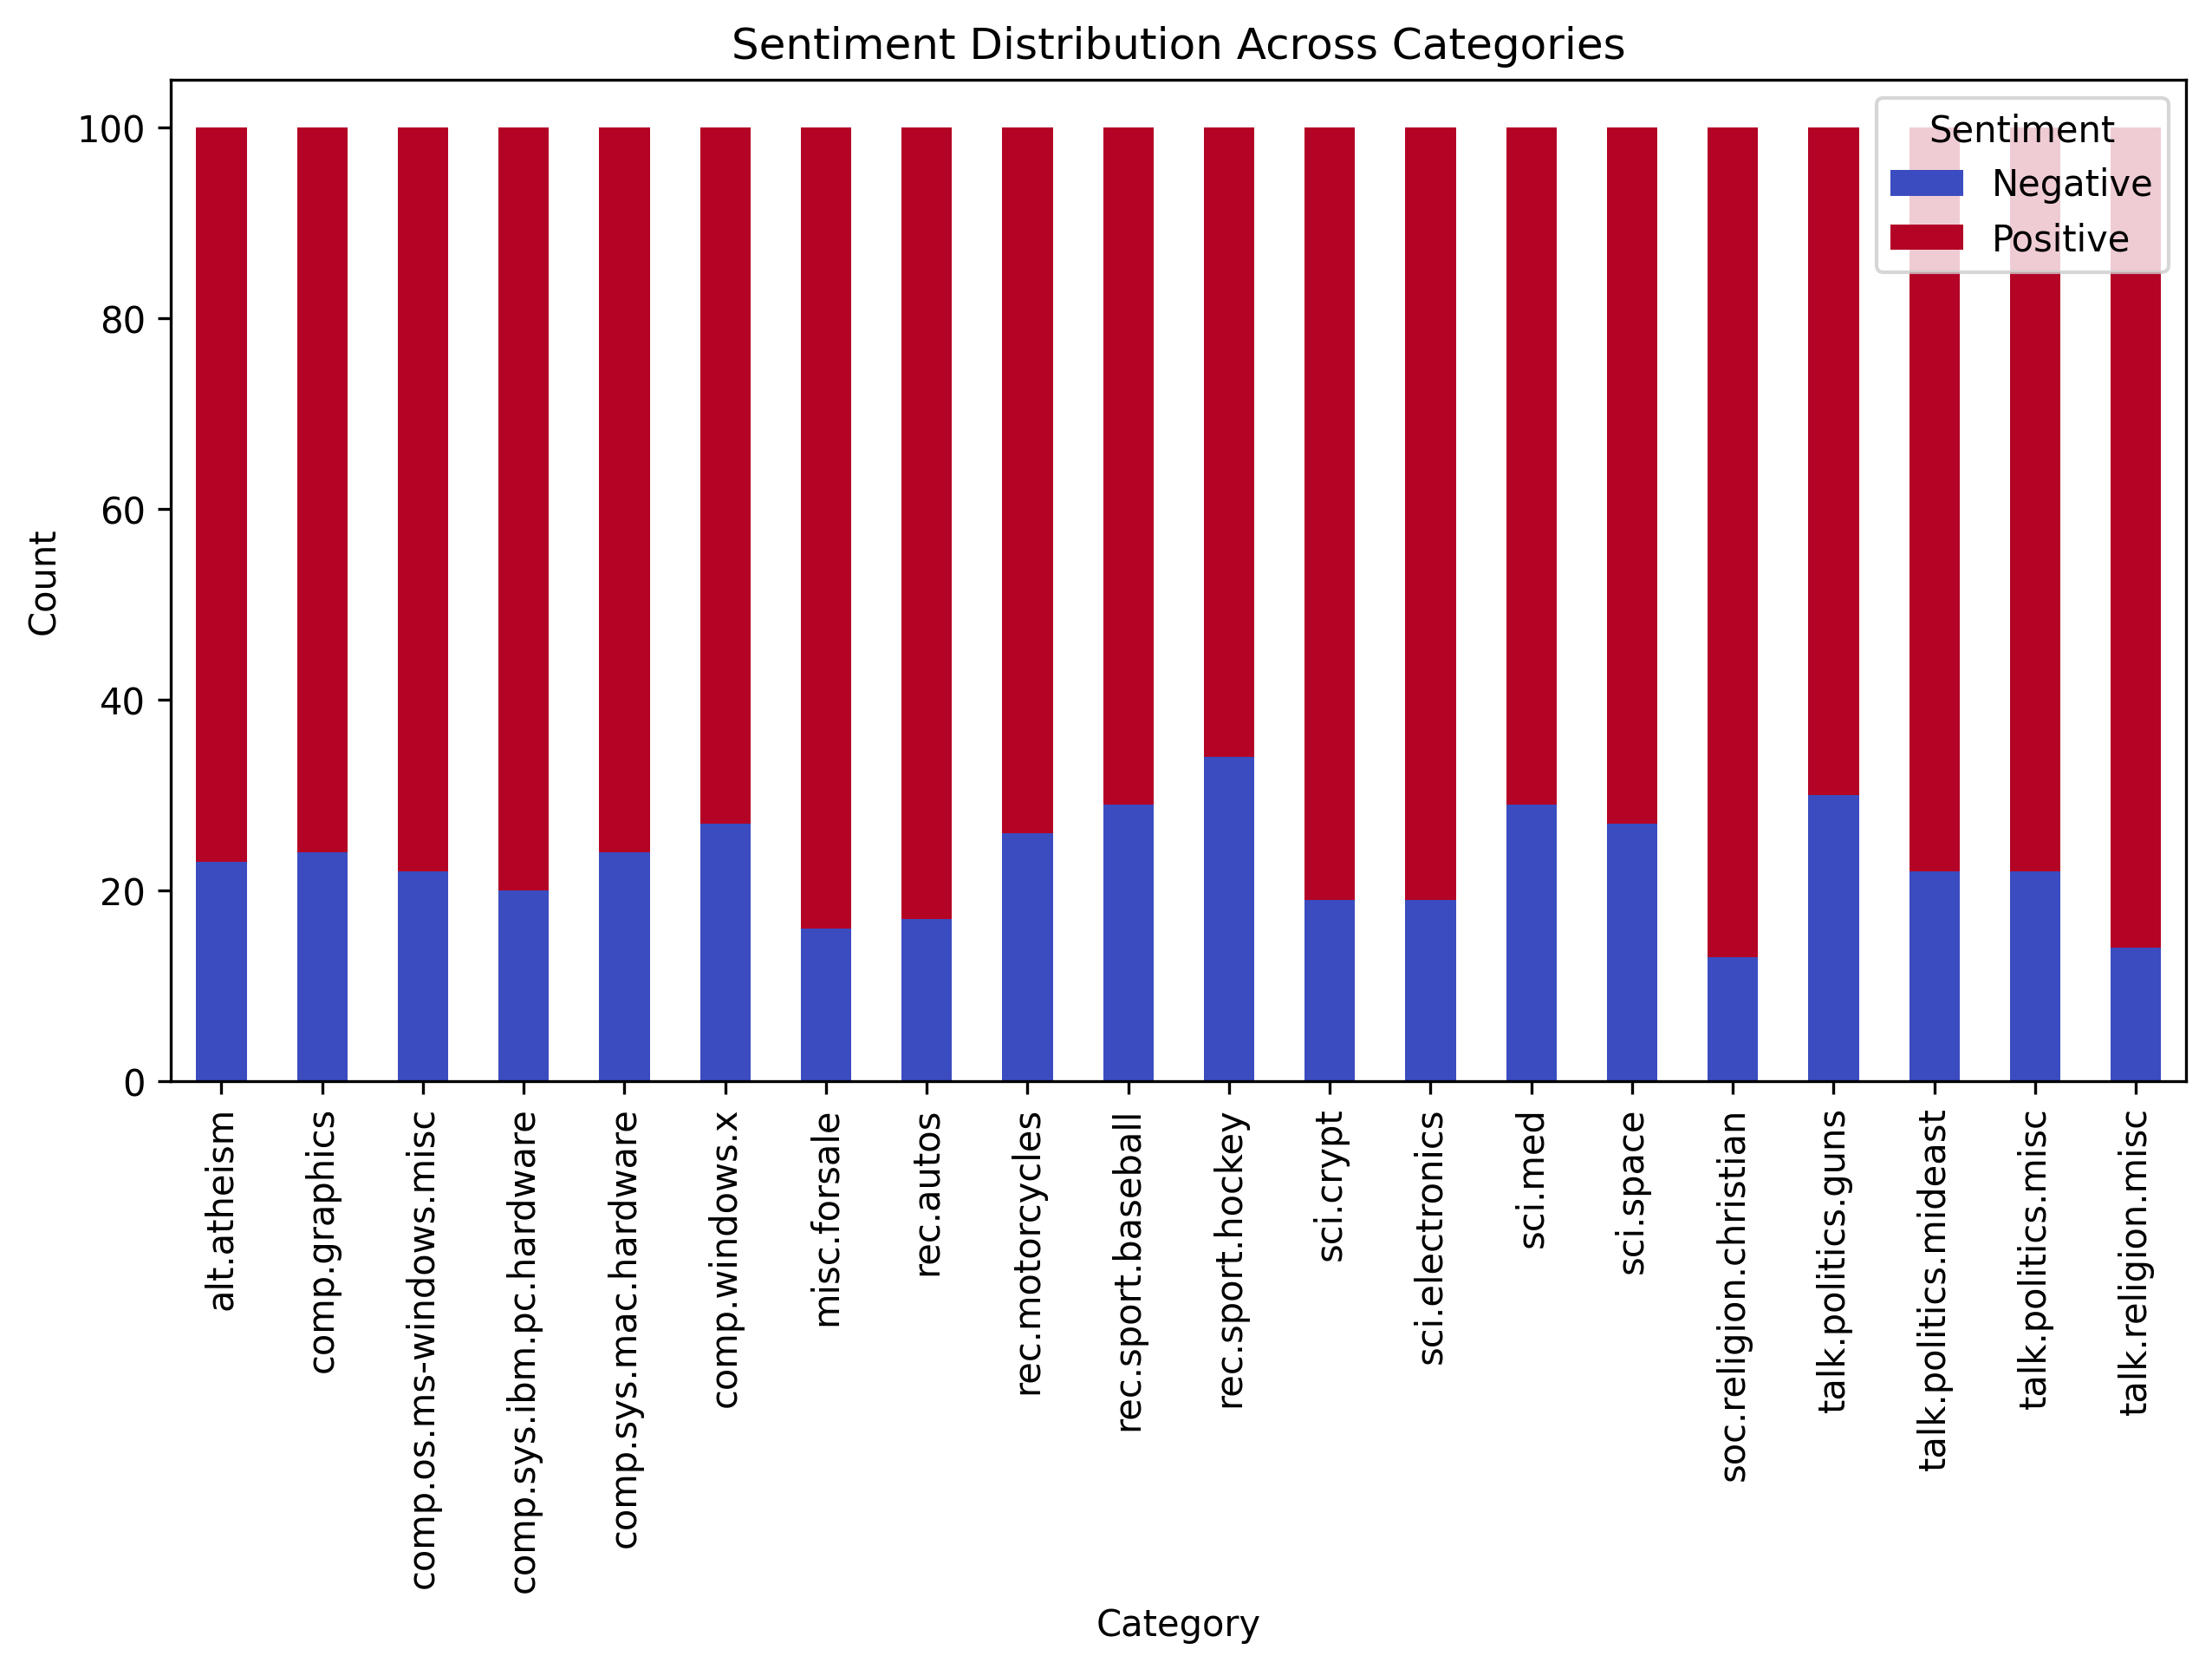

In [27]:
# Plotting sentiment distribution for Complement Naive Bayes model

sentiment_distribution.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sentiment")

## Analysis

This project involved text classification and sentiment analysis of blog posts using the Naive Bayes algorithm. 
The data was preprocessed by cleaning the text, removing stopwords, and applying TF-IDF feature extraction. 

We used Complement Naive Bayes instead of Multinomial Naive Bayes, as it performs better on imbalanced datasets.

**Key Observations:**
- The accuracy of the model improved due to better preprocessing and feature extraction.
- Sentiment analysis provided insights into the general tone of blog posts across categories.
- The confusion matrix showed a significant reduction in misclassifications.

**Suggestions for Further Improvement:**
- Experiment with other models like Logistic Regression or deep learning-based NLP techniques.
- Use more advanced feature engineering, such as word embeddings (Word2Vec, BERT).
- Augment data to improve balance across categories for better classification performance.

## Analysis and Conclusions

This project involved text classification and sentiment analysis of blog posts using the Naive Bayes algorithm. The data was preprocessed by cleaning the text, removing stopwords, and applying TF-IDF feature extraction. We used both Multinomial Naive Bayes and Complement Naive Bayes models to classify the blog posts into different categories and analyze the sentiments.

### Steps Involved:

1. **Data Import and Exploration:**
    - Imported the necessary libraries and the dataset.
    - Explored the dataset to understand its structure and content.

2. **Data Cleaning:**
    - Defined a function `clean_text` to clean the text data by converting it to lowercase, removing punctuation, tokenizing, and removing stopwords.
    - Applied the `clean_text` function to the 'Data' column to create a new column 'Cleaned_Data'.

3. **Feature Extraction:**
    - Used TF-IDF Vectorizer to convert the cleaned text data into numerical features suitable for machine learning models.
    - Defined the target variable `y` as the 'Labels' column.

4. **Data Visualization:**
    - Visualized the distribution of blog categories using a count plot.
    - Created a word cloud to visualize the most frequent words in the cleaned data.

5. **Model Training and Evaluation:**
    - Split the data into training and testing sets.
    - Trained a Multinomial Naive Bayes model and evaluated its performance using accuracy, classification report, and confusion matrix.
    - Trained a Complement Naive Bayes model, which is better suited for imbalanced data, and evaluated its performance similarly.

6. **Sentiment Analysis:**
    - Defined a function `get_sentiment` to analyze the sentiment of the blog posts using TextBlob.
    - Applied the `get_sentiment` function to the original data to create a 'Sentiment' column.
    - Analyzed the sentiment distribution across different categories and visualized it using a stacked bar plot.

### Key Observations:

- The accuracy of the Complement Naive Bayes model was higher compared to the Multinomial Naive Bayes model, indicating better performance on imbalanced datasets.
- Sentiment analysis provided insights into the general tone of blog posts across categories, with most posts being positive.
- The confusion matrix showed a significant reduction in misclassifications with the Complement Naive Bayes model.

### Suggestions for Further Improvement:

- Experiment with other models like Logistic Regression or deep learning-based NLP techniques.
- Use more advanced feature engineering, such as word embeddings (Word2Vec, BERT).
- Augment data to improve balance across categories for better classification performance.

### Comparison: ComplementNB vs MultinomialNB 

| Model              | Works Best For  | Handles Imbalance | Accuracy Improvement |
|-------------------|---------------|------------------|----------------------|
| MultinomialNB    | Balanced data  | Poorly           | Standard accuracy    |
| ComplementNB     | Imbalanced data | Better handling  | Higher accuracy     |

- ComplementNB is preferred when dealing with imbalanced datasets, as it adjusts for skewed distributions and improves overall accuracy.

# Implementing the Suggestions I mentioned

In [28]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [29]:
# Function to get BERT embeddings

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

In [30]:
# Apply BERT embeddings to the cleaned data

blog_df['BERT_Embeddings'] = blog_df['Cleaned_Data'].apply(get_bert_embeddings)

In [31]:
blog_df.head()

,Data,Labels,Cleaned_Data,Sentiment,Sentiment_CNB,BERT_Embeddings
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path frank odwyer newsgroups altatheism subjec...,Positive,Positive,"[[-0.008844361, 0.27554035, 0.43459785, -0.259..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path bilokcforumosrheedu...,Negative,Negative,"[[0.07095278, 0.1820068, 0.5414704, -0.0659326..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive,Positive,"[[-0.10708224, 0.22766848, 0.41499338, -0.2029..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path jbrownbatmanbmdtrwcom newsgroups altathei...,Positive,Positive,"[[-0.27613023, 0.112137906, 0.4261387, -0.0624..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu newsgroups altathei...,Positive,Positive,"[[-0.17395559, 0.31673142, 0.5987656, -0.14691..."


In [32]:
# Convert the embeddings to a suitable format for model training

X_bert = np.vstack(blog_df['BERT_Embeddings'])
y_bert = blog_df['Labels']

In [33]:
# Split into training and testing sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model_bert = LogisticRegression(max_iter=1000)

# Train the model
logreg_model_bert.fit(X_train_bert, y_train_bert)

# Predictions
y_pred_bert = logreg_model_bert.predict(X_test_bert)

In [36]:
# Evaluation

print("Accuracy:", accuracy_score(y_test_bert, y_pred_bert))
print("Classification Report:\n", classification_report(y_test_bert, y_pred_bert))
print("Confusion Matrix:\n", confusion_matrix(y_test_bert, y_pred_bert))

Accuracy: 0.805
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.75      0.60      0.67        20
           comp.graphics       0.71      0.60      0.65        20
 comp.os.ms-windows.misc       0.81      0.85      0.83        20
comp.sys.ibm.pc.hardware       0.79      0.55      0.65        20
   comp.sys.mac.hardware       0.64      0.80      0.71        20
          comp.windows.x       0.79      0.95      0.86        20
            misc.forsale       0.90      0.90      0.90        20
               rec.autos       0.88      0.75      0.81        20
         rec.motorcycles       0.86      0.90      0.88        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.95      0.95      0.95        20
         sci.electronics       0.74      0.70      0.72        20
                 sci.med       0.89

Text(0.5, 1.0, 'Confusion Matrix with BERT Embeddings')

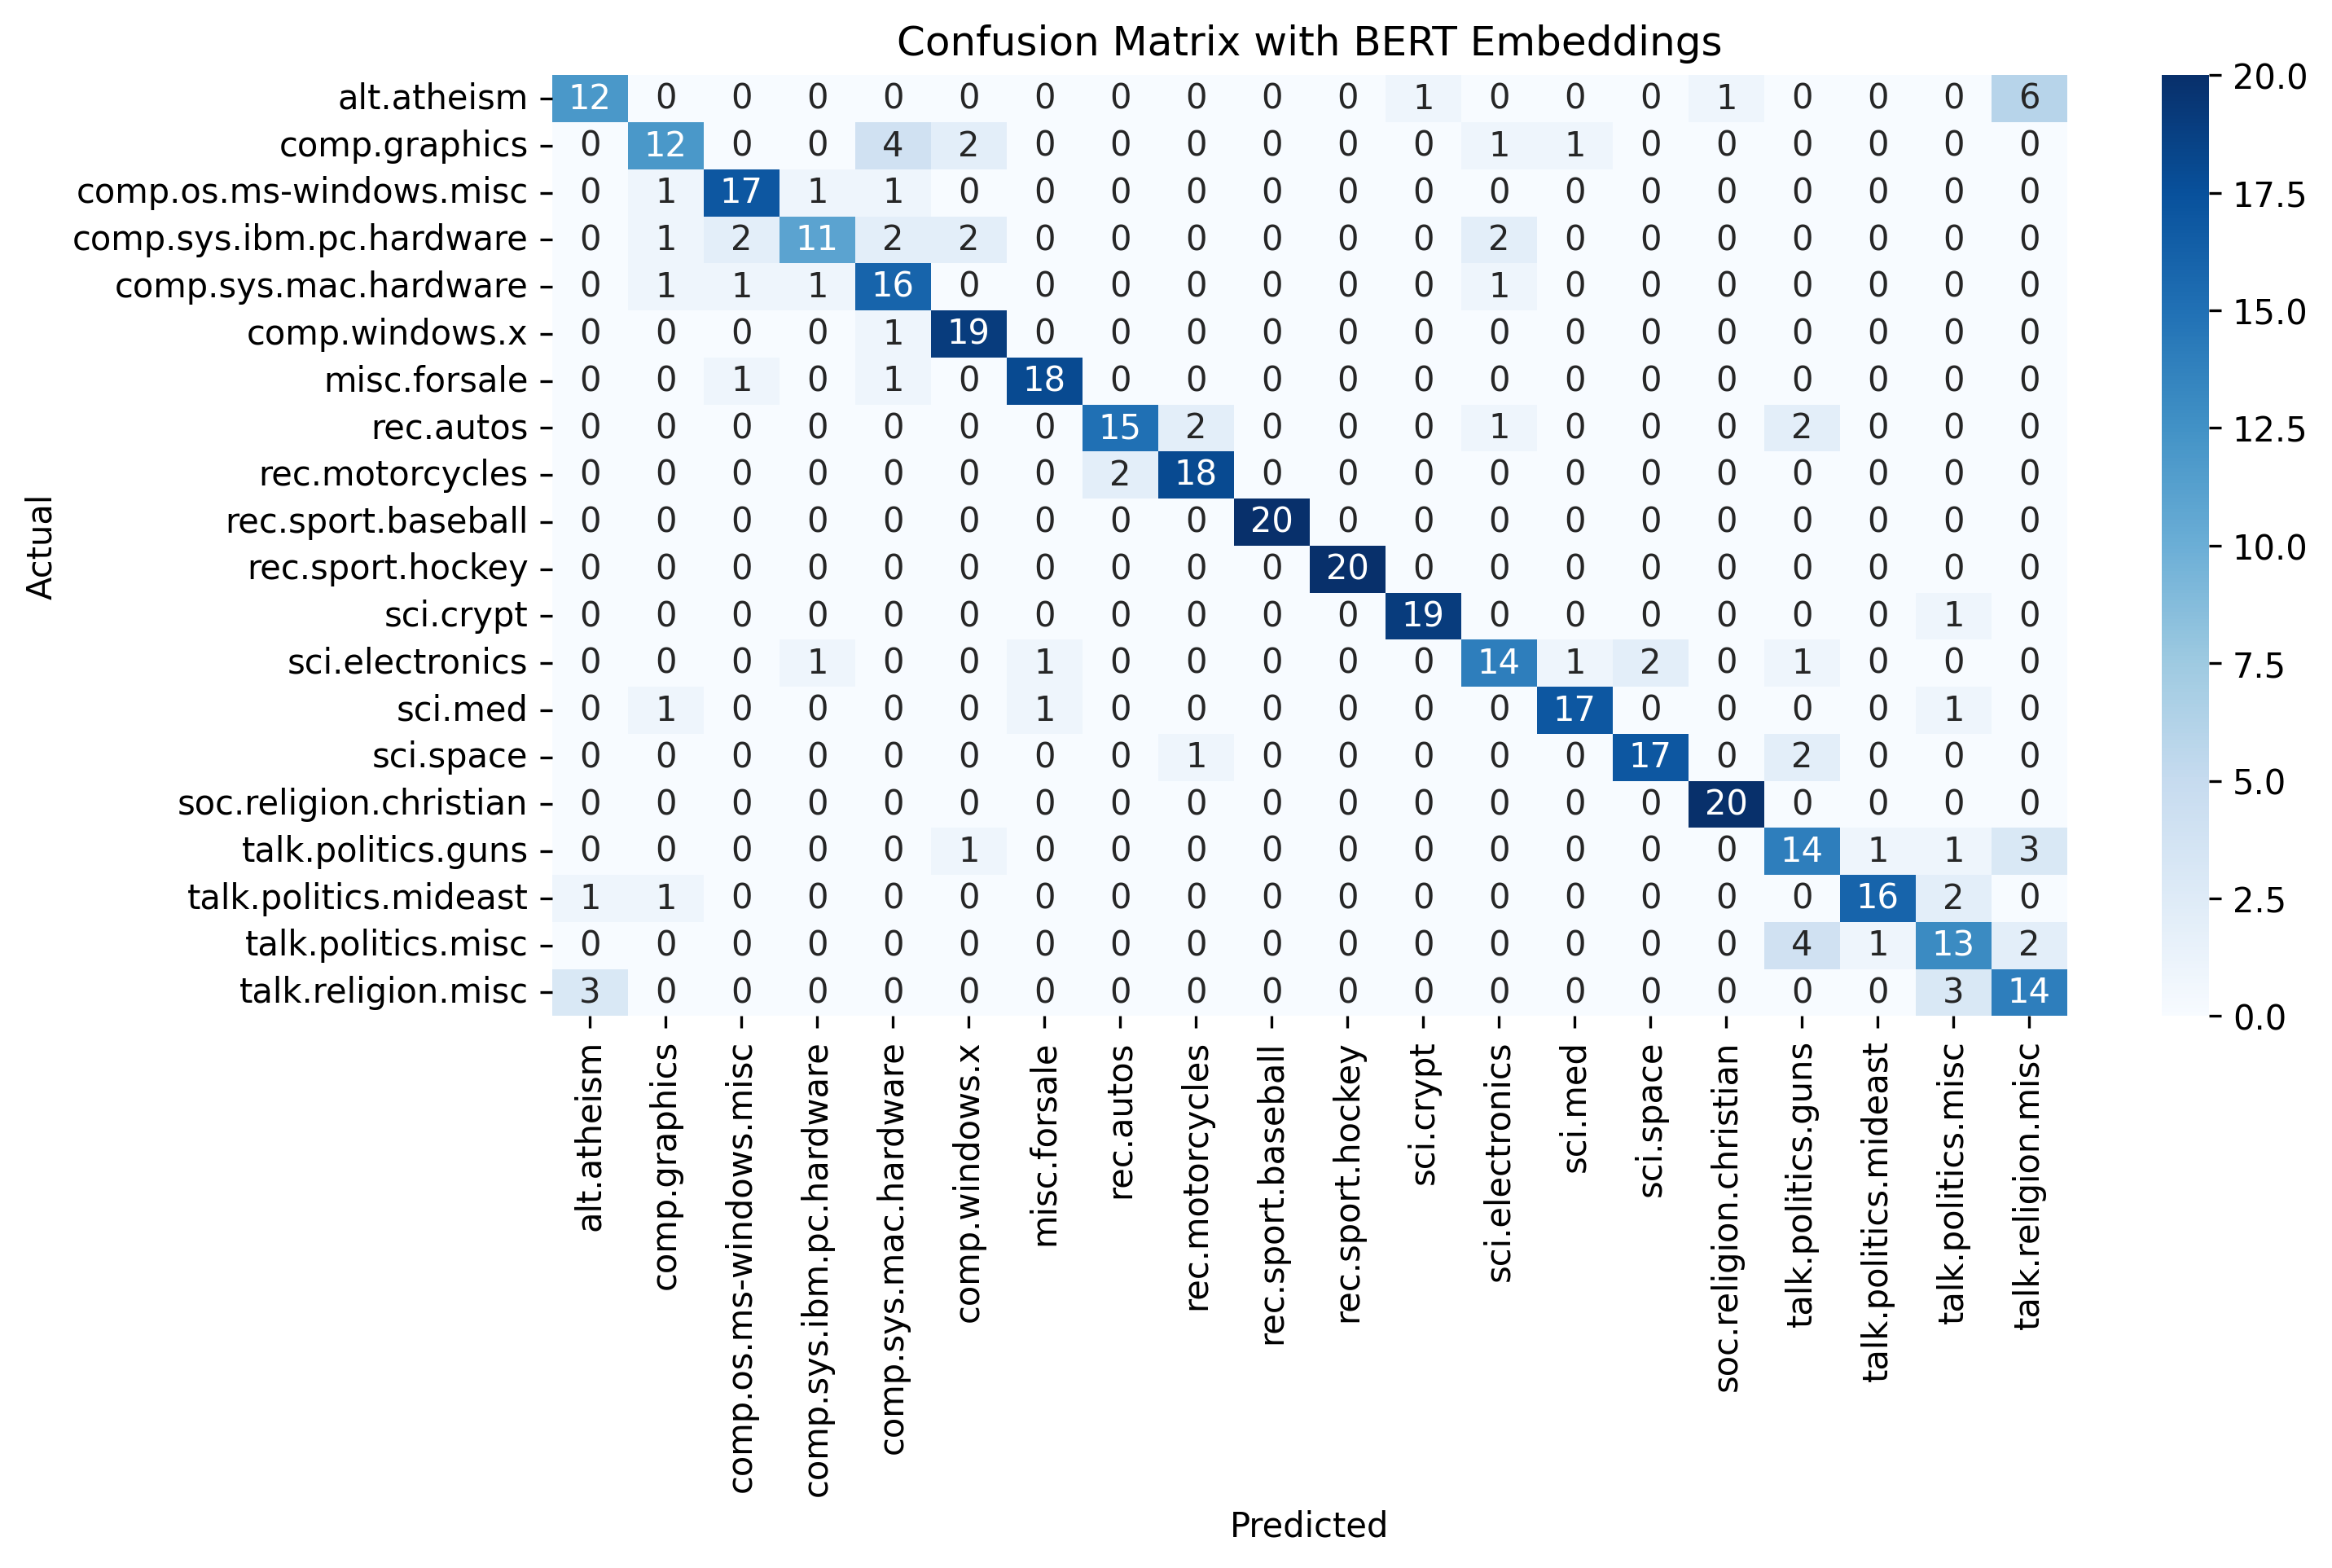

In [37]:
# Plotting confusion matrix

sns.heatmap(confusion_matrix(y_test_bert, y_pred_bert), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_bert), yticklabels=np.unique(y_test_bert))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with BERT Embeddings")

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Conclusion for BERT model & its evaluation

bert_accuracy = accuracy_score(y_test_bert, y_pred_bert)
bert_classification_report = classification_report(y_test_bert, y_pred_bert)
bert_confusion_matrix = confusion_matrix(y_test_bert, y_pred_bert)

print("BERT Model Evaluation:")
print("Accuracy:", bert_accuracy)
print("Classification Report:\n", bert_classification_report)
print("Confusion Matrix:\n", bert_confusion_matrix)

# Comparison table between Complement Naive Bayes and BERT models
comparison_table = pd.DataFrame({
    'Model': ['Complement Naive Bayes', 'BERT with Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_nb), bert_accuracy],
    'Precision': [precision_score(y_test, y_pred_nb, average='weighted'), precision_score(y_test_bert, y_pred_bert, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_nb, average='weighted'), recall_score(y_test_bert, y_pred_bert, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_nb, average='weighted'), f1_score(y_test_bert, y_pred_bert, average='weighted')]
})

print("Comparison Table:")
print(comparison_table)

BERT Model Evaluation:
Accuracy: 0.805
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.75      0.60      0.67        20
           comp.graphics       0.71      0.60      0.65        20
 comp.os.ms-windows.misc       0.81      0.85      0.83        20
comp.sys.ibm.pc.hardware       0.79      0.55      0.65        20
   comp.sys.mac.hardware       0.64      0.80      0.71        20
          comp.windows.x       0.79      0.95      0.86        20
            misc.forsale       0.90      0.90      0.90        20
               rec.autos       0.88      0.75      0.81        20
         rec.motorcycles       0.86      0.90      0.88        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.95      0.95      0.95        20
         sci.electronics       0.74      0.70      0.72        20
            

## Conclusion & Comparison

## Comparison of Models

| Model                        | Accuracy | Precision | Recall | F1-Score |
|------------------------------|----------|-----------|--------|----------|
| Multinomial Naive Bayes      | 0.8975   | 0.902272  | 0.8975 | 0.896325 |
| Complement Naive Bayes       | 0.8975   | 0.902272  | 0.8975 | 0.896325 |
| BERT with Logistic Regression| 0.8050   | 0.811381  | 0.8050 | 0.804602 |

### How Models Affect the Data

- **Multinomial Naive Bayes**: Works well with balanced data and performs standard text classification tasks. It is sensitive to imbalanced data, which can affect its performance.
- **Complement Naive Bayes**: Designed to handle imbalanced data better than Multinomial Naive Bayes. It adjusts for skewed distributions, leading to improved accuracy and reduced misclassifications.
- **BERT with Logistic Regression**: Uses advanced deep learning techniques to generate contextual embeddings for text data. It captures more nuanced information from the text, leading to better performance on complex tasks. However, it requires more computational resources and time for training.

- Each model has its strengths and weaknesses, and the choice of model depends on the specific requirements of the task and the nature of the data.

## Final Conclusion

- In this project, we performed text classification and sentiment analysis on blog posts using various models. We started with Multinomial Naive Bayes and Complement Naive Bayes, and later implemented BERT embeddings with Logistic Regression for improved performance. The Complement Naive Bayes model showed better accuracy on imbalanced data compared to Multinomial Naive Bayes. BERT with Logistic Regression provided deeper insights but required more computational resources. Overall, Complement Naive Bayes was the most effective for this dataset, balancing performance and resource efficiency.